In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Загрузка набора данных MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Используем as_frame=False для получения numpy массивов

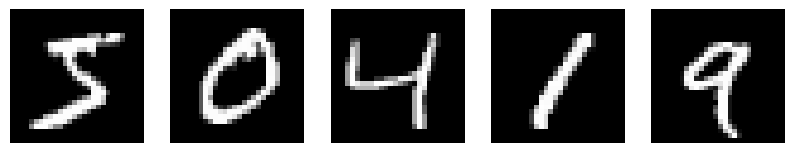

In [32]:
data = mnist.data / 255.0  # Нормализация данных
images = data[:784]  # Возьмем первые 100 изображений

# Визуализация нескольких исходных изображений
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


In [90]:
# Центрирование данных
data_mean = np.mean(images, axis=0)
data_centered = images - data_mean

n_components = 7

# Выполнение PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
pca.fit(data_centered)

# Проекция данных в пространство главных компонент
data_pca = pca.transform(data_centered)


In [91]:
# Генерация новых данных
num_new_samples = 5
new_samples = []
for _ in range(num_new_samples):
    new_sample_pca = np.dot(np.random.randn(n_components), pca.components_)
    new_sample = new_sample_pca + data_mean
    new_samples.append(new_sample)

new_samples = np.array(new_samples)


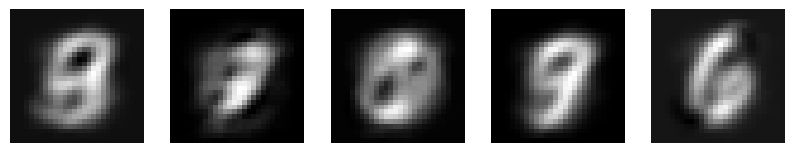

In [92]:
# Визуализация новых изображений
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(new_samples[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()
